# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [165]:
# Import relevant libraries
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [166]:
# Visit the website
# Use requests to fetch the website content instead of Splinter's browser
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
response = requests.get(url)


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [167]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(response.text, 'html.parser')

In [168]:
# Locate the table and extract all rows of data
table = soup.find('table')  # Assuming there's a table element
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [169]:
# Create an empty list to store the rows of data
mars_data = []

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cells = row.find_all('td')
    row_data = [cell.text.strip() for cell in cells]
    mars_data.append(row_data)

In [170]:
# Create an empty list to store the rows of data
data_rows = []

# Loop through the table rows to extract the data
table = soup.find('table')  # Find the table element
rows = table.find_all('tr')  # Find all the rows in the table

for row in rows[1:]:  # Skip the header row
    cols = row.find_all('td')  # Get all the columns in the row
    cols = [col.text.strip() for col in cols]  # Extract the text and strip extra spaces
    data_rows.append(cols)  # Append the data to the list

# List of column names as per the scraped data from the Mars Weather page
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame by using the list of rows and the column names
mars_weather_df = pd.DataFrame(data_rows, columns=columns)


In [171]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [172]:
# Examine data type of each column
print(mars_weather_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [173]:
# Change data types for data analysis
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(float)


In [174]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                       object
min_temp                    object
pressure                    object
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [175]:
# 1. How many months are there on Mars?
mars_months = mars_weather_df['month'].nunique()
print(f"There are {mars_months} months on Mars.")

There are 12 months on Mars.


In [176]:
# 2. How many sols (Martian days) worth of data are there?
mars_sols = mars_weather_df['sol'].nunique()
print(f"There are {mars_sols} sols worth of data.")

There are 1867 sols worth of data.


In [177]:
# Convert the 'min_temp' column to numeric, forcing any non-convertible values to NaN
mars_weather_df['min_temp'] = pd.to_numeric(mars_weather_df['min_temp'], errors='coerce')

# Now try grouping by 'month' and calculating the mean
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
print(avg_min_temp)


month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


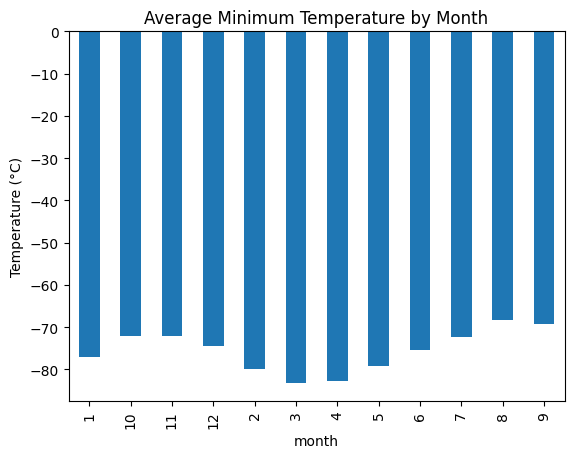

In [178]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', ylabel='Temperature (°C)', title='Average Minimum Temperature by Month')
plt.show()

In [179]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_temp_df = avg_min_temp.sort_values()
coldest_month = sorted_temp_df.idxmin()
hottest_month = sorted_temp_df.idxmax()

print(f"The coldest month on Mars is Month {coldest_month}")
print(f"The hottest month on Mars is Month {hottest_month}")

The coldest month on Mars is Month 3
The hottest month on Mars is Month 8


In [180]:
# 4. What is the average pressure by month?
# Convert 'min_temp' column to numeric, forcing non-convertible values to NaN
mars_weather_df['min_temp'] = pd.to_numeric(mars_weather_df['min_temp'], errors='coerce')

# Drop any rows where 'min_temp' is NaN (optional, depending on if you want to keep them)
mars_weather_df.dropna(subset=['min_temp'], inplace=True)

# Now try grouping by 'month' and calculating the mean
avg_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
print(avg_min_temp)


month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


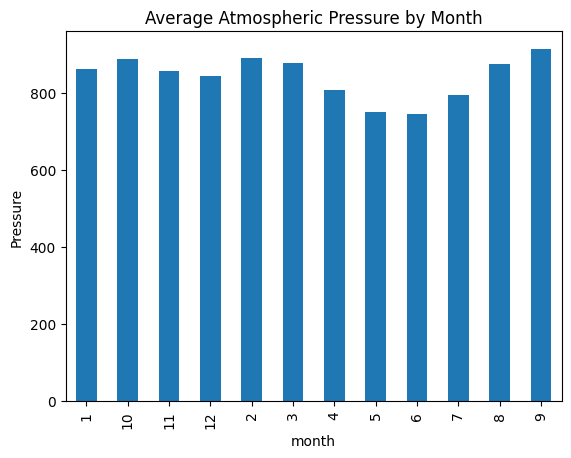

In [181]:
# Plot the average pressure by month
# Ensure the 'pressure' column contains numeric values
mars_weather_df['pressure'] = pd.to_numeric(mars_weather_df['pressure'], errors='coerce')

# Drop any rows where 'pressure' is NaN (if necessary)
mars_weather_df.dropna(subset=['pressure'], inplace=True)

# Calculate the average pressure by month
avg_pressure = mars_weather_df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
avg_pressure.plot(kind='bar', ylabel='Pressure', title='Average Atmospheric Pressure by Month')
plt.show()


In [182]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_to_highest_pressure = avg_pressure.sort_values()
lowest_pressure_month = lowest_to_highest_pressure.idxmin()
highest_pressure_month = lowest_to_highest_pressure.idxmax()

print(f"The month with the lowest atmospheric pressure is Month {lowest_pressure_month}")
print(f"The month with the highest atmospheric pressure is Month {highest_pressure_month}")



The month with the lowest atmospheric pressure is Month 6
The month with the highest atmospheric pressure is Month 9


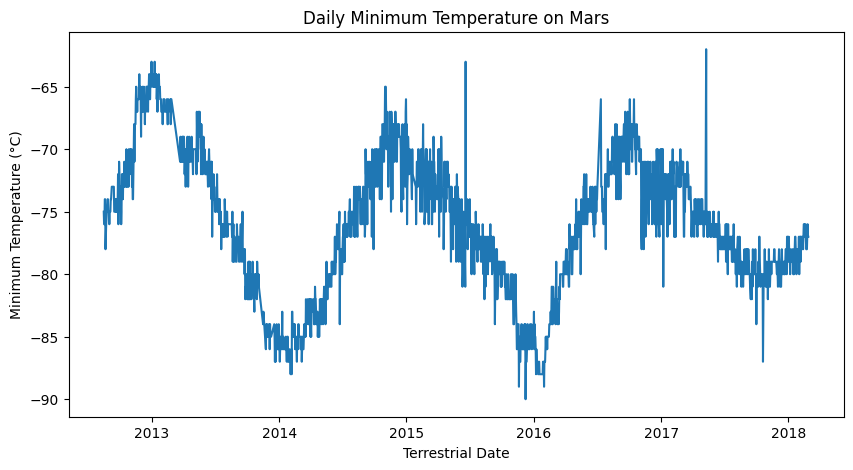

In [183]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10,5))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'])
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.show()

#### Minimum Temperature

The coldest month on Mars, based on the data, is Month 3, which shows the lowest average minimum temperature at Curiosity’s location. This suggests that during this Martian month, the Curiosity rover experiences the most frigid conditions, likely due to seasonal changes on Mars. In contrast, Month 8 is identified as the warmest month, showing the highest average minimum temperature. The variation in temperature across months highlights the seasonal dynamics at Curiosity’s location on Mars.

#### Atmospheric Pressure

The month with the lowest atmospheric pressure is Month 6, indicating that atmospheric pressure on Mars decreases significantly during this time. Conversely, Month 9 shows the highest atmospheric pressure. This variation in pressure across different months is likely influenced by Martian seasonal changes, which affect air density and atmospheric dynamics. Understanding these pressure variations is crucial for planning future missions, particularly in terms of landing and operational strategies on Mars.

#### Year Length

By plotting the daily minimum temperature over time, we can visually estimate the duration of a Martian year, which is approximately 687 Earth days. This behavior helps scientists better understand the climate patterns on Mars and offers insights into how the planet's orbit around the Sun influences its temperature fluctuations throughout the year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [184]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)